<a href="https://colab.research.google.com/github/karunakarsura/yolo-model/blob/main/training_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Install Ultralytics YOLOv8 and PyTorch
print("📦 Installing YOLOv8 and dependencies...")
!pip install --quiet ultralytics==8.* torch torchvision

print("✅ Installation complete.")

📦 Installing YOLOv8 and dependencies...
✅ Installation complete.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload "vegetation segmentation.v2i.yolov8.zip"

Saving vegetation segmentation.v2i.yolov8.zip to vegetation segmentation.v2i.yolov8.zip


In [ ]:
import zipfile, os

dataset_zip = list(uploaded.keys())[0]
dataset_dir = "/content/vegetation_segmentation_dataset"

os.makedirs(dataset_dir, exist_ok=True)
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall(dataset_dir)

print("✅ Dataset extracted to:", dataset_dir)
print("Contents:", os.listdir(dataset_dir))

✅ Dataset extracted to: /content/vegetation_segmentation_dataset
Contents: ['valid', 'train', 'data.yaml', 'README.dataset.txt', 'README.roboflow.txt', 'test']


In [ ]:
data_yaml = os.path.join(dataset_dir, "data.yaml")
if not os.path.exists(data_yaml):
    data_yaml = os.path.join(dataset_dir, "data_custom.yaml")
    with open(data_yaml, "w") as f:
        f.write(f"""train: {dataset_dir}/train/images
val: {dataset_dir}/valid/images
nc: 1
names: ['vegetation']
""")

print("✅ Data YAML ready at:", data_yaml)
!cat {data_yaml}

✅ Data YAML ready at: /content/vegetation_segmentation_dataset/data.yaml
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['vegetation']

roboflow:
  workspace: blue-halo
  project: vegetation-segmentation
  version: 2
  license: Public Domain
  url: https://universe.roboflow.com/blue-halo/vegetation-segmentation/dataset/2

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.yaml")  # or yolov8m.yaml for larger model

results = model.train(
    data=data_yaml,
    epochs=100,
    imgsz=640,
    batch=16,
    project="/content/runs/train",
    name="vegetation_yolov8_scratch",
    device=0,
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.215 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/vegetation_segmentation_dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=Fal

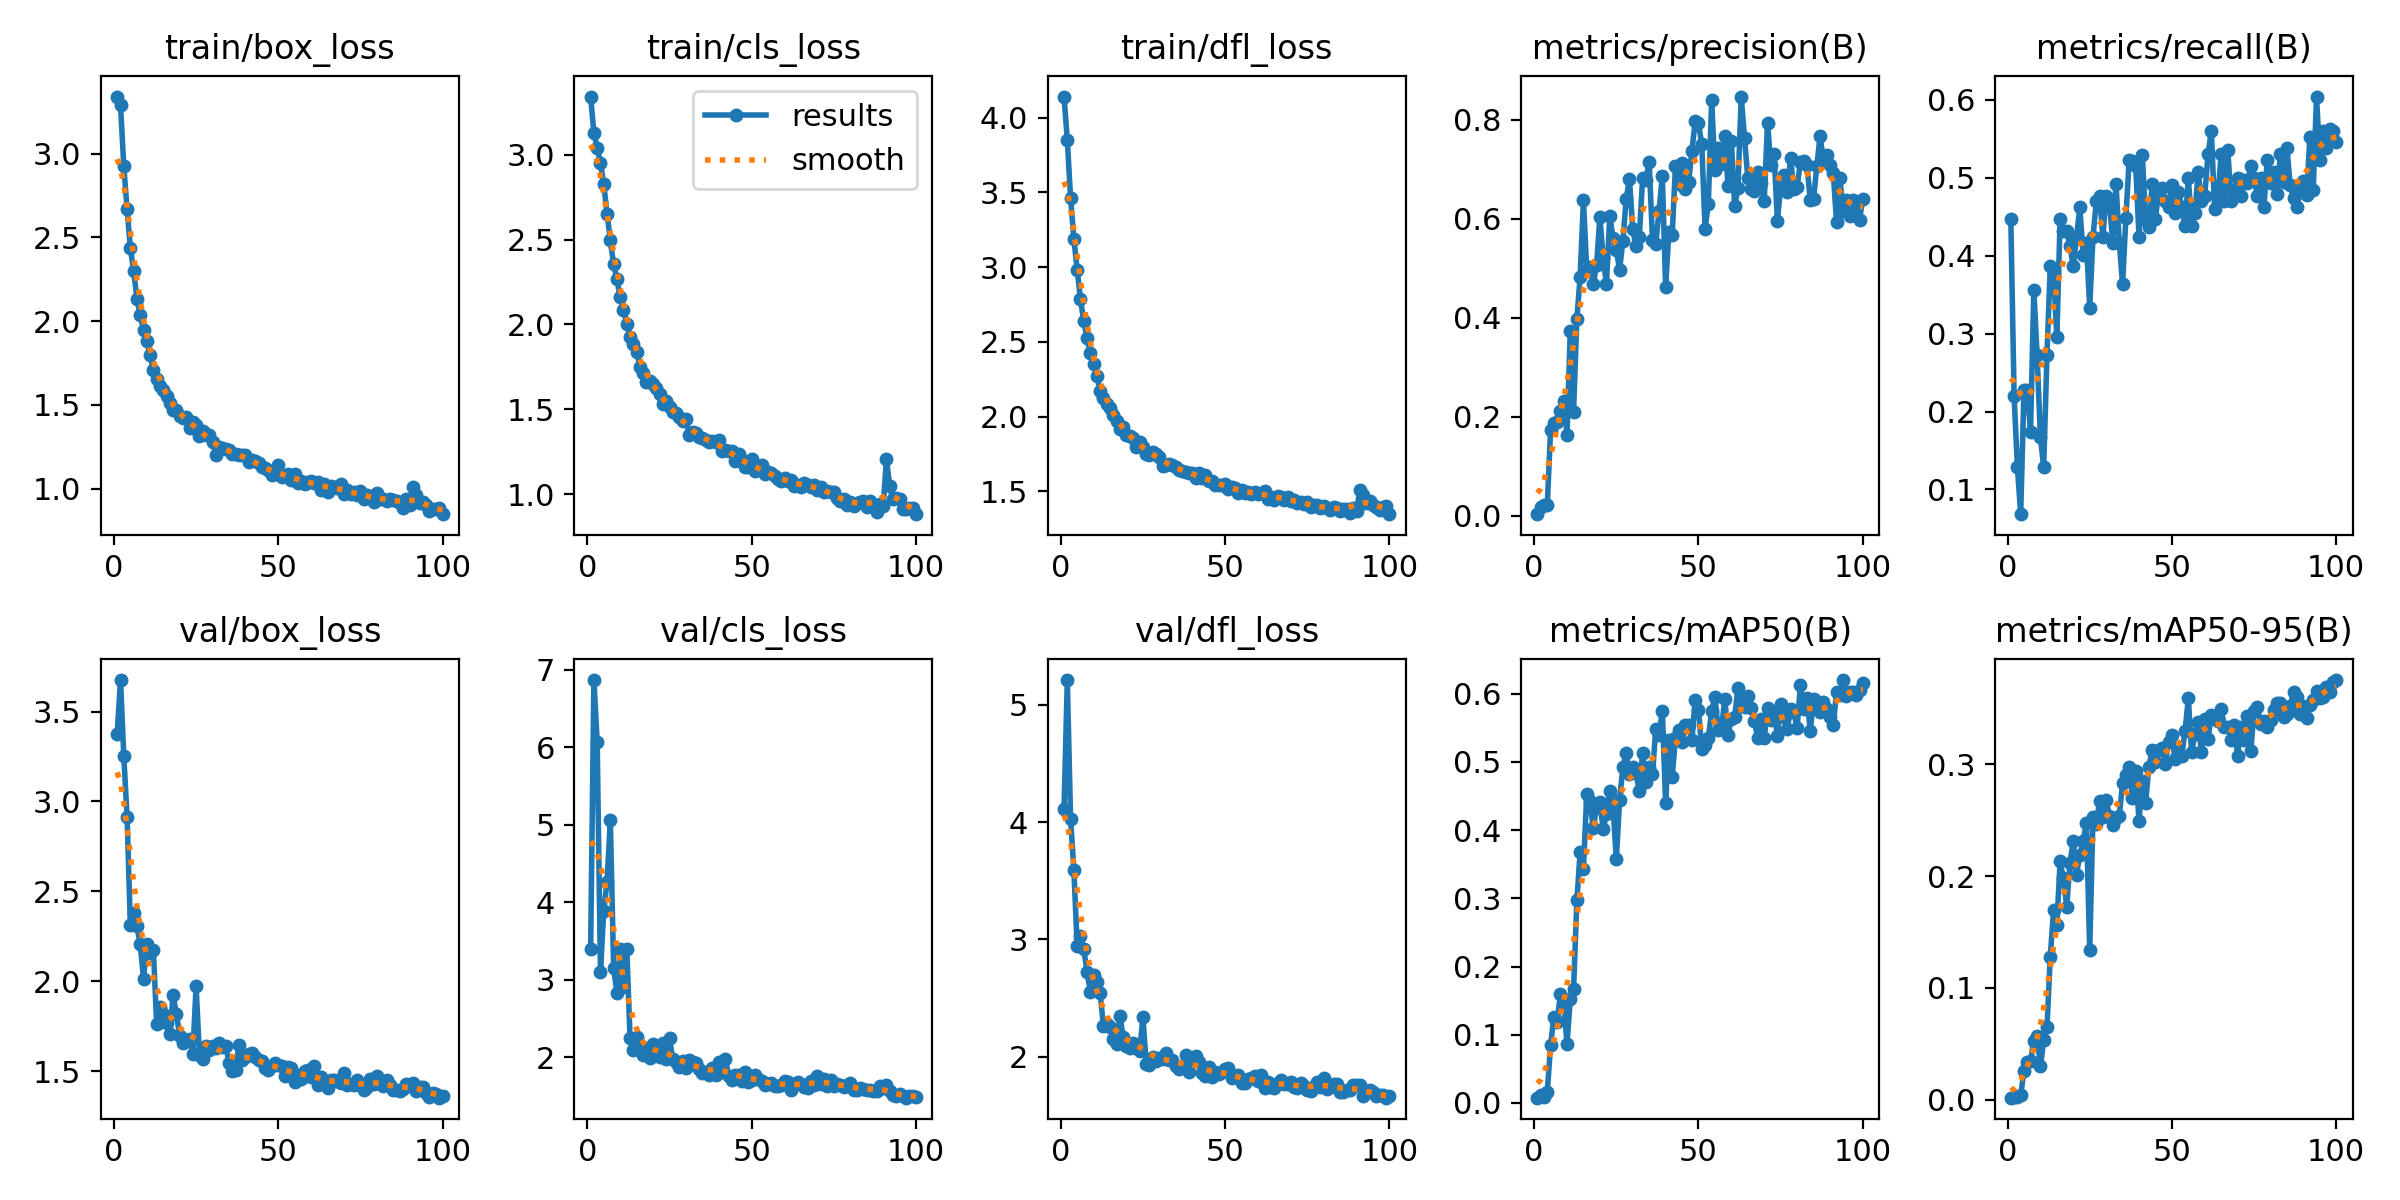

In [ ]:
from IPython.display import Image, display
display(Image(filename="/content/runs/train/vegetation_yolov8_scratch/results.png"))

In [ ]:
!cp -r /content/runs/train /content/drive/MyDrive/
print("✅ Training complete and copied to Drive.")

✅ Training complete and copied to Drive.


In [ ]:
import os
from ultralytics import YOLO

dataset_dir = "/content/vegetation_segmentation_dataset"
train_yaml_path = os.path.join(dataset_dir, "train_val.yaml")

with open(train_yaml_path, "w") as f:
    f.write(f"""train: {dataset_dir}/train/images
val: {dataset_dir}/train/images
nc: 1
names: ['vegetation']
""")

model = YOLO("/content/runs/train/vegetation_yolov8_scratch/weights/best.pt")
val_results = model.val(data=train_yaml_path, imgsz=640, batch=16, device=0)
print("✅ Validation on training set complete.")

Ultralytics 8.3.215 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3723.1±727.9 MB/s, size: 330.4 KB)
val: Scanning /content/vegetation_segmentation_dataset/train/labels.cache... 681 images, 78 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 681/681 660.0Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 43/43 3.7it/s 11.6s
                   all        681       1729      0.828      0.779      0.883      0.691
Speed: 1.2ms preprocess, 4.1ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to /content/runs/detect/val
✅ Validation on training set complete.


In [ ]:
test_images_dir = f"{dataset_dir}/valid/images"
test_results = model.predict(source=test_images_dir, imgsz=640, conf=0.25, save=True)
print("✅ Test predictions complete. Check 'runs/detect/predict' for results.")


image 1/59 /content/vegetation_segmentation_dataset/valid/images/0-0-20_png.rf.fc47a980f69ef8a4fca62f2ba0020b5c.jpg: 640x640 3 vegetations, 7.3ms
image 2/59 /content/vegetation_segmentation_dataset/valid/images/0-10-9_png.rf.9d52e3f2e793ce21ce737e4c69f66a70.jpg: 640x640 4 vegetations, 7.3ms
image 3/59 /content/vegetation_segmentation_dataset/valid/images/0-11-46_png.rf.1252e9afbcafddbf1ffd8d6ff6c7dff5.jpg: 640x640 1 vegetation, 7.3ms
image 4/59 /content/vegetation_segmentation_dataset/valid/images/0-12-2_png.rf.88338502f55abbbdb215779d568397d4.jpg: 640x640 1 vegetation, 7.3ms
image 5/59 /content/vegetation_segmentation_dataset/valid/images/0-14-44_png.rf.52f4eefd419b51e697ea101f422abf17.jpg: 640x640 1 vegetation, 7.2ms
image 6/59 /content/vegetation_segmentation_dataset/valid/images/0-14-7_png.rf.b3ec9ff5ed49936c9a6ec843685be78d.jpg: 640x640 4 vegetations, 7.3ms
image 7/59 /content/vegetation_segmentation_dataset/valid/images/0-15-3_png.rf.804bf757936551ec76b873f481adfcbb.jpg: 640x640

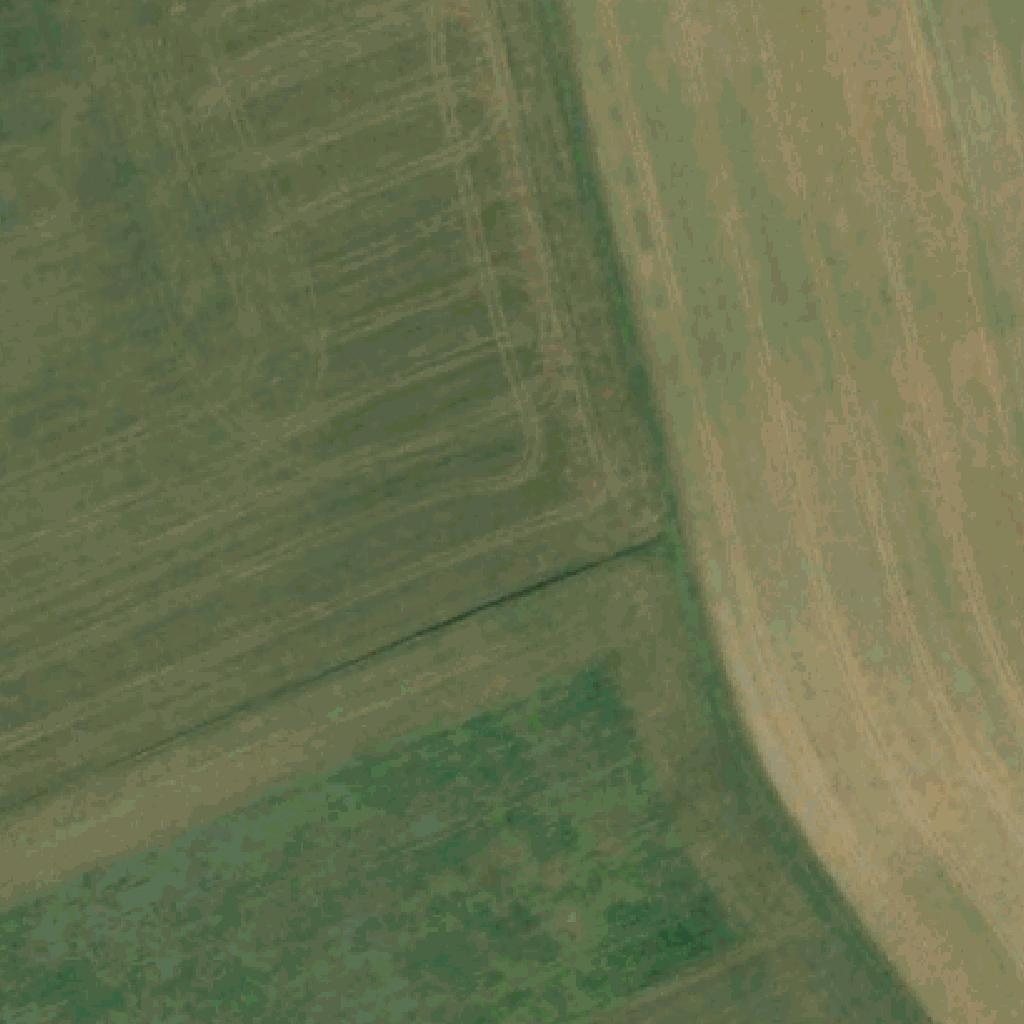

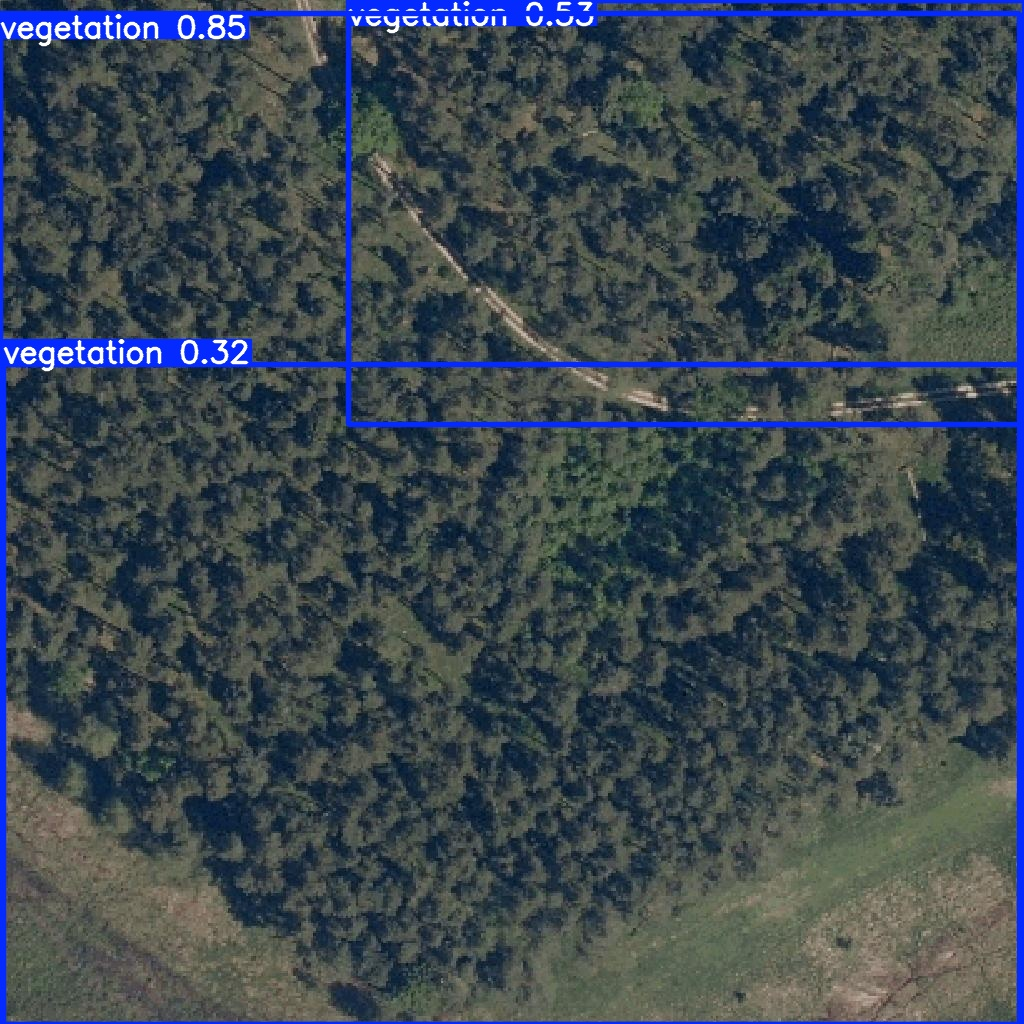

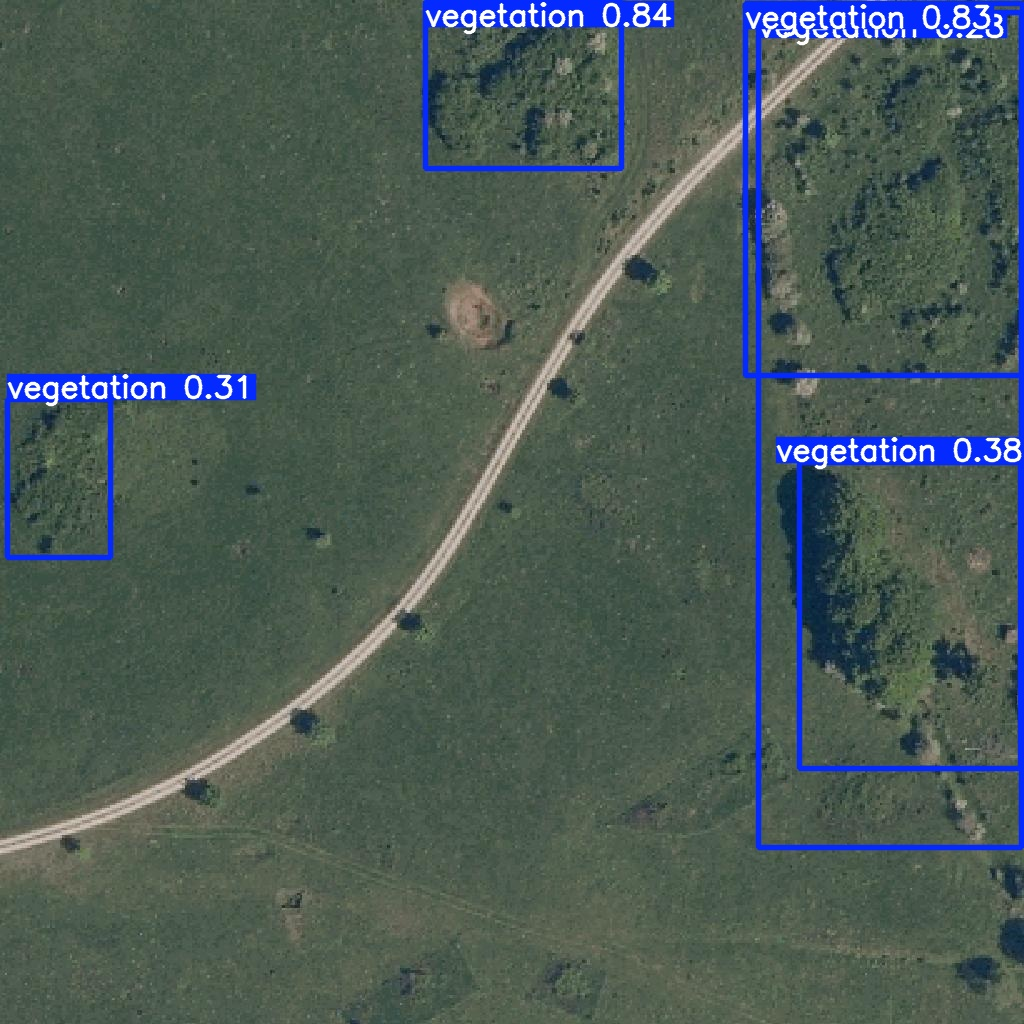

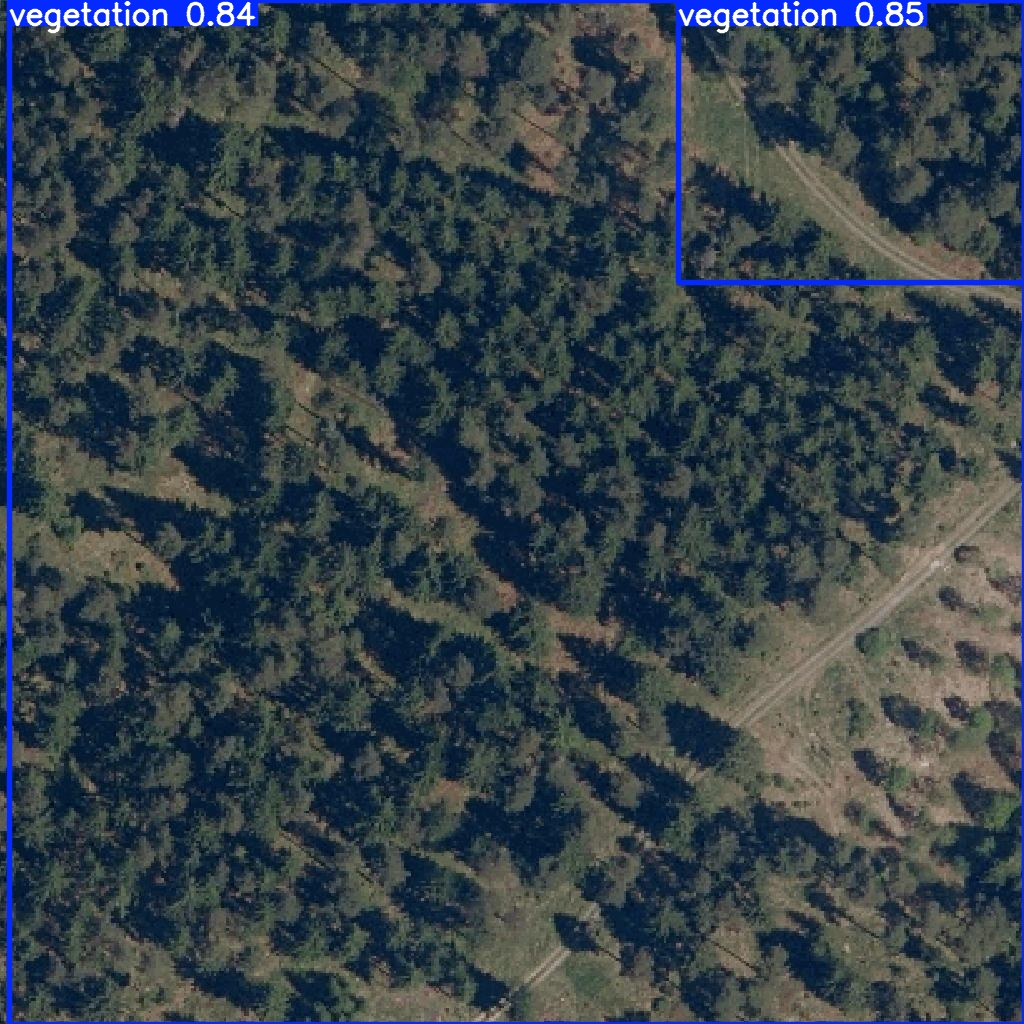

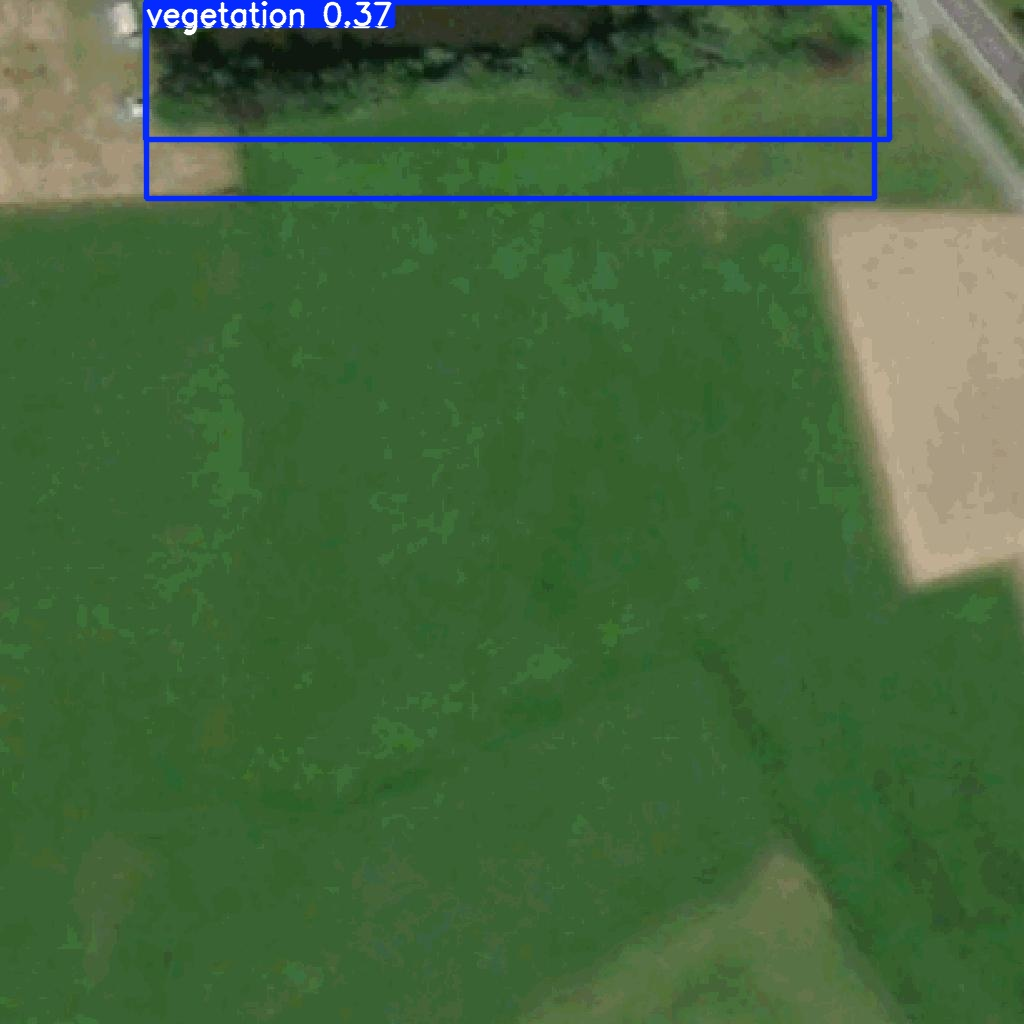

In [ ]:
from IPython.display import Image, display
import glob

predicted_images = glob.glob("runs/detect/predict/*.jpg")
for img_path in predicted_images[:5]:
    display(Image(filename=img_path))